In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report

df = pd.read_csv("Student Depression Dataset.csv")

# drop id because its irrelevant, city because there's too much, profession because they are all students
# work pressure and job satisfaction because they are all 0s
df.drop(columns=["id", "City", "Profession", "Work Pressure", "Job Satisfaction"], inplace=True)

categorical_attributes = ["Gender", "Sleep Duration", "Dietary Habits", "Degree", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]
numerical_attributes = ["Age", "Academic Pressure", "CGPA", "Study Satisfaction", "Work/Study Hours", "Financial Stress"]

label_encoders = {}
for attr in categorical_attributes:
    le = LabelEncoder()
    df[attr] = le.fit_transform(df[attr])
    label_encoders[attr] = le


# convert into bins to reduce complexity
df["Age"] = pd.cut(df["Age"], bins=[0, 25, 35, 60], labels=[0, 1, 2]).astype(int)
df["CGPA"] = pd.cut(df["CGPA"], bins=[0, 5, 7.5, 8.75, 10], labels=[0, 1, 2, 3], include_lowest=True).astype(int)

# convert floats into ints
df["Age"] = df["Age"].astype(int)
df["Academic Pressure"] = df["Academic Pressure"].astype(int)
df["CGPA"] = df["CGPA"].astype(int)
df["Study Satisfaction"] = df["Study Satisfaction"].astype(int)
df["Work/Study Hours"] = df["Work/Study Hours"].astype(int)
df["Financial Stress"] = df["Financial Stress"].fillna(0).astype(int)

# training
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Depression"])
X_train = train_df.drop(columns=["Depression"])
X_test = test_df.drop(columns=["Depression"])
y_train = train_df["Depression"]
y_test = test_df["Depression"]

# Naïve Bayes
nb_classifier = CategoricalNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

# evaluation
print(f"Model evaluation: \n{classification_report(y_test, y_pred)}")

Model evaluation: 
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2313
           1       0.85      0.87      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



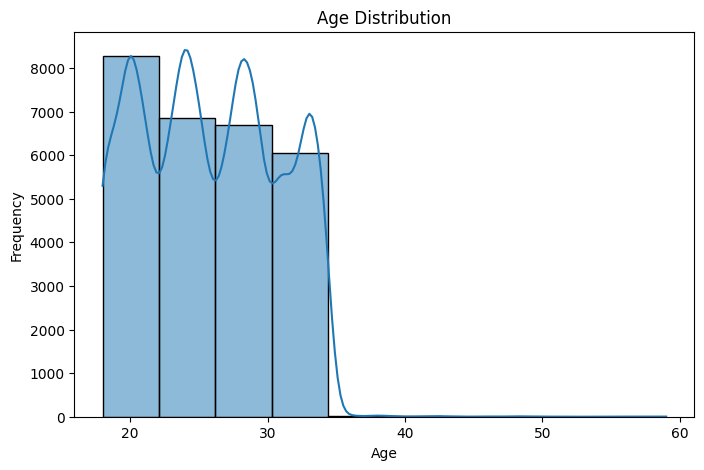

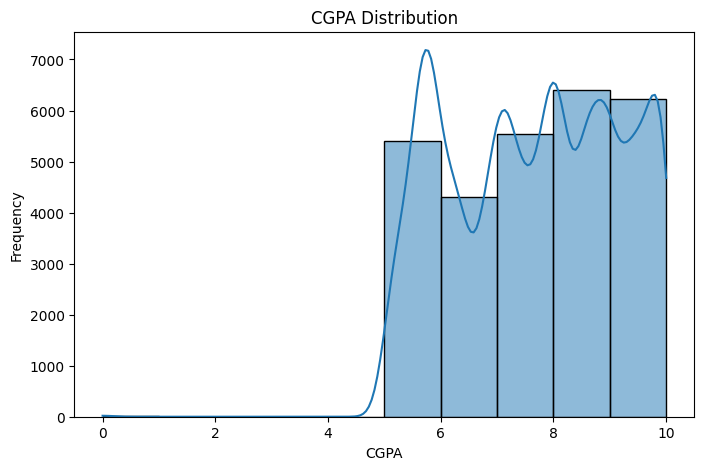

Age: Min = 18.0 , Max = 59.0
CGPA: Min = 0.0 , Max = 10.0


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Student Depression Dataset.csv")

plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=10, kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df["CGPA"], bins=10, kde=True)
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.title("CGPA Distribution")
plt.show()

print("Age: Min =", df["Age"].min(), ", Max =", df["Age"].max())
print("CGPA: Min =", df["CGPA"].min(), ", Max =", df["CGPA"].max())

